# Matplotlib

- Author: *{{Fu}}*
- Update: *August 6, 2022*
- Reading: *30 min*

---


## 3D Misfit Space

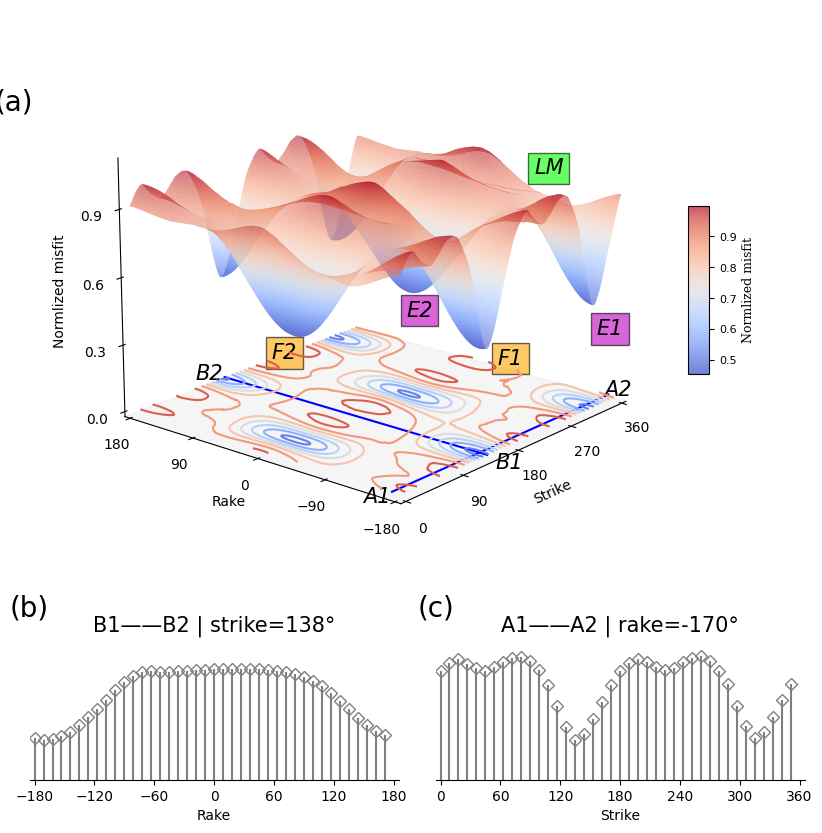

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 28 22:09:35 2021

@author: yf
"""

import numpy as np
import os
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm



############### 1. input parameter
rank_path = "../files/3d-mcmtpy/"
MPI_n = 30
strike_num = 361                                                                # step:5度 = 73  ||  step:1度 = 361
rake_num = 361

Strike = 138                                                                    # rake 剖面时，选取strike的数值
Rake = -170                                                                     # strike 剖面时，选取rake的数值

Num_stem = 40


############### 2. read data
for i in range(0, MPI_n, 1):
    FM_all_path = os.path.join(rank_path, 'rank_'+str(i)+'_FM_all')
    if i == 0:
        FM_all = np.loadtxt(FM_all_path)
    else:
        FM_all = np.vstack((FM_all, np.loadtxt(FM_all_path)))

misfit_all = FM_all[:, 0]
mag_all = FM_all[:, 1]
strike_all = FM_all[:, 2]
dip_all = FM_all[:, 3]
rake_all = FM_all[:, 4]
depth_all = FM_all[:, 5]

index_min = np.where(misfit_all == np.min(misfit_all))[0]
fm_min = FM_all[index_min]                                                      # 全局最小值


strike = np.linspace(0, 360, strike_num)                                        # strike_all
rake = np.linspace(-180, 180, rake_num)                                         # rake_all
X, Y = np.meshgrid(strike, rake)
Z = misfit_all.reshape((strike_num,rake_num))/max(misfit_all)  # 此时需要转置才能对应xy平面
Z=Z.T
for i in range(0, strike_num, 1):
    if (strike[i] <= Strike) and (strike[i+1] > Strike):
        strike_index = i
for i in range(0, rake_num, 1):
    if (rake[i] <= Rake) and (rake[i+1] > Rake):
        rake_index = i
rake_2D = Z[ :,strike_index]                                                    # rake 二维剖面的数组
strike_2D = Z[ rake_index,:]                                                    # strike 二维剖面的数组



############### 3. plot
fig = plt.figure(figsize=(10, 10))
gs1 = gridspec.GridSpec(4, 2)
# fig.suptitle('Strike and Rake Grid-Search')
fig.subplots_adjust(wspace=0.1, hspace=0.5)


### 3.1. 3-D subplot
cmap = 'coolwarm'                                                               # coolwarm plasma viridis
ax = plt.subplot(gs1[:-1, :], projection='3d')
# plt.rcParams['font.sans-serif'] = ['Times New Roman']
surf = ax.plot_surface(X, Y, Z, cmap=cmap, shade=True, antialiased=True, rstride=1, cstride=1, alpha=0.7)
ax.contour(X, Y, Z, zdir='z', offset=0, cmap=cmap)

ax.set_xlim(0, 360)
ax.set_ylim(-180, 180)
ax.set_zlim(0, 1.1)
ax.set_xlabel('Strike')
ax.set_ylabel('Rake')
ax.zaxis.set_rotate_label(False)   # 必须禁用z轴标签的自动旋转
ax.set_zlabel('Normlized misfit', rotation=90)

x_major_locator=MultipleLocator(90)                                             # 坐标刻度间隔
y_major_locator=MultipleLocator(90)
z_major_locator=MultipleLocator(0.3)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
ax.zaxis.set_major_locator(z_major_locator)
ax.grid(False)   # 关闭网格
# ax.invert_xaxis()  # 反转x轴
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # x 面的背景色设置为透明
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # y 面的背景色设置为透明
ax.view_init(elev=18, azim=220)    # 20 60
# ax.set_axis_off()
# ax.set_xticks([])#不显示x坐标轴
# ax.set_yticks([])#不显示y坐标轴
# ax.set_zticks([])#不显示z坐标轴

# colorbar
cb=fig.colorbar(surf, shrink=0.3, aspect=8)
font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 9,
        }
cb.set_label('Normlized misfit',fontdict=font)
cb.ax.tick_params(labelsize=8)  # colorbar 标签字体大小

# text
ax.text(190, -168, 0.35, 'F1', style='italic', fontsize=15,verticalalignment='center',
        horizontalalignment='center',bbox = dict(facecolor = "orange", alpha = 0.6))

ax.text(30, -4, 0.4, 'F2', style='italic', fontsize=15,verticalalignment='center',
        horizontalalignment='center',bbox = dict(facecolor = "orange", alpha = 0.6))

ax.text(260, -160, 1.1, 'LM', style='italic', fontsize=15,verticalalignment='center',
        horizontalalignment='center',bbox = dict(facecolor = "lime", alpha = 0.6))


ax.text(360, -170, 0.30, 'E1', style='italic', fontsize=15,verticalalignment='center',
        horizontalalignment='center',bbox = dict(facecolor = "m", alpha = 0.6))

ax.text(250, 0, 0.35, 'E2', style='italic', fontsize=15,verticalalignment='center',
        horizontalalignment='center',bbox = dict(facecolor = "m", alpha = 0.6))


# 画两条横线
ax.plot(strike,Rake*np.ones(shape=strike.shape) , zs=0, zdir='z',color='b')
ax.text(-20, -168, 0,'A1', style='italic', fontsize=15,verticalalignment='center',horizontalalignment='center')
ax.text(380, -168, 0,'A2', style='italic', fontsize=15,verticalalignment='center',horizontalalignment='center')

ax.plot(Strike*np.ones(shape=rake.shape),rake , zs=0, zdir='z',color='b')
ax.text(135, -210, 0,'B1', style='italic', fontsize=15,verticalalignment='center',horizontalalignment='center')
ax.text(135, 200, 0,'B2', style='italic', fontsize=15,verticalalignment='center',horizontalalignment='center')

ax.text(-100, 240, 1.4,'(a)',horizontalalignment='center', verticalalignment='center',\
          fontsize=20, color='k',alpha=1,zorder=1) 

#%% 3.2. strike subplot
ax = plt.subplot(gs1[-1, 1])
x = np.linspace(0, 360, strike_num)


tt = []
yy = []
for i in range(0,Num_stem,1):
    if i == 0:
        tt.append(x[0])
        yy.append(strike_2D[0])
    else:
        index = math.floor(i*strike_num/Num_stem)
        tt.append( x[index] )
        yy.append( strike_2D[index] )

markerline, stemlines, baseline=ax.stem(tt, yy, linefmt='grey', markerfmt='D', bottom=0)
markerline.set_markerfacecolor('none')
ax.set_xlabel('Strike')
ax.set_xlim(-5, 365)
ax.set_ylim(0.2, 1.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(False)
x_major_locator=MultipleLocator(60)
ax.xaxis.set_major_locator(x_major_locator)
ax.set_title('A1——A2 | rake=-170°',fontsize=15)

ax.text(-5, 1.3,'(c)',horizontalalignment='center', verticalalignment='center',\
          fontsize=20, color='k',alpha=1,zorder=1) 

#%% 3.3. rake subplot
ax = plt.subplot(gs1[-1, 0])
x = np.linspace(-180, 180, rake_num)
Num_stem = 40

tt = []
yy = []
for i in range(0,Num_stem,1):
    if i == 0:
        tt.append(x[0])
        yy.append(rake_2D[0])
    else:
        index = math.floor(i*rake_num/Num_stem)
        tt.append( x[index] )
        yy.append( rake_2D[index] )

markerline, stemlines, baseline=ax.stem(tt, yy, linefmt='grey', markerfmt='D', bottom=0)
markerline.set_markerfacecolor('none')
ax.set_xlabel('Rake')
ax.set_xlim(-185, 185)
ax.set_ylim(0.2, 1.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(False)
x_major_locator=MultipleLocator(60)
ax.xaxis.set_major_locator(x_major_locator)
ax.set_title('B1——B2 | strike=138°',fontsize=15)

ax.text(-185, 1.3,'(b)',horizontalalignment='center', verticalalignment='center',\
          fontsize=20, color='k',alpha=1,zorder=1) 
    
#%% 4. save figure
plt.show()
# figurename=os.path.join('./grid1.pdf')
# fig.savefig(figurename,dpi=800, format='pdf')

## 1D Histogram

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 30 16:16:28 2021

@author: yf
"""

import numpy as np
import os,sys
import json5
import matplotlib.pyplot as plt
from obspy.imaging.beachball import beachball



#%% 1.input path
sample_path      = '../files/1d-histogram'

MPI_n=30                                                                         # 第一次试验：其中 MPI-3 与 MPI-9 采样陷入了极小值，从0开始数 || 第二次实验：MPI-24
MPI_n_st           = 0
Chains_n_st        = 0
num_bins=50
N = 2000                                                                        # 从第几个开始画






#%% 2.read data
FM_all=[]
for i in range(0,MPI_n,1):
    if i!=4 and i!=12 and i!=15:
        rank_path = os.path.join(sample_path,'Output_'+'rand_'+str(i),'rank_'+str(MPI_n_st)+'_output')
        FM_path   = os.path.join(rank_path,'chain_'+str(Chains_n_st)+'_FM_2_accept_all')
        FM        = np.loadtxt(FM_path)
        FM_all.append(FM)

FM1=[];FM2=[]
LM1=[];LM2=[]

MPI_n = MPI_n-3

## 2.1 纠正 strike/rake 的周期跳跃问题
for i in range(0,MPI_n,1):
    for k in range(1,4,1):
        for j in range(0,FM_all[i].shape[0]):
            if k==1:                                                        # strike 周期跳跃
                if FM_all[i][j,k]>360 and FM_all[i][j,k]<720:
                    FM_all[i][j,k]=FM_all[i][j,k]-360
                if FM_all[i][j,k]<0 and FM_all[i][j,k]>(-360):
                    FM_all[i][j,k]=FM_all[i][j,k]+360
            if k==3:                                                         # rake 周期跳跃
                if FM_all[i][j,k]>120:
                    FM_all[i][j,k]=FM_all[i][j,k]-360

## 2.2 分为4组解
for i in range(0,MPI_n,1):
    strike_mean = FM_all[i][:,1].mean()
    if strike_mean>100 and strike_mean<150:  # FM1
        FM1.append(i)
    if strike_mean>0 and strike_mean<80:  # FM5
        FM2.append(i)
    if strike_mean>300 and strike_mean<360:  # LM1
        LM1.append(i)
    if strike_mean>200 and strike_mean<250:  # LM2
        LM2.append(i)
    if strike_mean>250 and strike_mean<300:  # LM2    #                         找到未收敛的 core 每次可能不一样！！
        # print(i)
        pass

## 2.3 计算4组解的平均值
LM1_mu_all=[]
LM1_sigma_all=[]
for i in LM1:
    mu_all=[]
    sigma_all=[]
    for k in range(0,8,1):
        mu=np.around(np.mean(FM_all[i][N:,k]), decimals=5)                        # Keep two decimal places
        sigma =np.around(np.std(FM_all[i][N:,k]), decimals=5)
        mu_all.append(mu)
        sigma_all.append(sigma)
    LM1_mu_all.append(mu_all)
    LM1_sigma_all.append(sigma_all)
LM1_mu=np.around(np.mean(LM1_mu_all,axis=0),decimals=2)
LM1_sigma=np.around(np.mean(LM1_sigma_all,axis=0),decimals=2)


LM2_mu_all=[]
LM2_sigma_all=[]
for i in LM2:
    mu_all=[]
    sigma_all=[]
    for k in range(0,8,1):
        mu=np.around(np.mean(FM_all[i][N:,k]), decimals=5)                        # Keep two decimal places
        sigma =np.around(np.std(FM_all[i][N:,k]), decimals=5)
        mu_all.append(mu)
        sigma_all.append(sigma)
    LM2_mu_all.append(mu_all)
    LM2_sigma_all.append(sigma_all)
LM2_mu=np.around(np.mean(LM2_mu_all,axis=0),decimals=2)
LM2_sigma=np.around(np.mean(LM2_sigma_all,axis=0),decimals=2)


FM1_mu_all=[]
FM1_sigma_all=[]
for i in FM1:
    mu_all=[]
    sigma_all=[]
    for k in range(0,8,1):
        mu=np.around(np.mean(FM_all[i][N:,k]), decimals=5)                        # Keep two decimal places
        sigma =np.around(np.std(FM_all[i][N:,k]), decimals=5)
        mu_all.append(mu)
        sigma_all.append(sigma)
    FM1_mu_all.append(mu_all)
    FM1_sigma_all.append(sigma_all)
FM1_mu=np.around(np.mean(FM1_mu_all,axis=0),decimals=2)
FM1_sigma=np.around(np.mean(FM1_sigma_all,axis=0),decimals=2)


FM2_mu_all=[]
FM2_sigma_all=[]
for i in FM2:
    mu_all=[]
    sigma_all=[]
    for k in range(0,8,1):
        mu=np.around(np.mean(FM_all[i][N:,k]), decimals=5)                        # Keep two decimal places
        sigma =np.around(np.std(FM_all[i][N:,k]), decimals=5)
        mu_all.append(mu)
        sigma_all.append(sigma)
    FM2_mu_all.append(mu_all)
    FM2_sigma_all.append(sigma_all)

FM2_mu=np.around(np.mean(FM2_mu_all,axis=0),decimals=2)
FM2_sigma=np.around(np.mean(FM2_sigma_all,axis=0),decimals=2)




#%% 3. plot
fig, axs = plt.subplots(4, 2, dpi=800,figsize=(9, 13))
# plt.rcParams['font.sans-serif'] = ['Times New Roman']
fig.subplots_adjust(wspace =0.2, hspace =0.5)
for k in range(0,8,1):
    s1 = k//2
    s2 = k%2
    for i in range(0,MPI_n,1):
        # if i!=3 and i!=9:
        if i!=24:
            mu=np.around(np.mean(FM_all[i][N:,k]), decimals=5)                        # Keep two decimal places
            sigma =np.around(np.std(FM_all[i][N:,k]), decimals=5)
        
            if i in FM1:
                facecolor = 'navajowhite'
            elif i in FM2:
                facecolor = 'navajowhite'
            elif i in LM1:
                facecolor = 'lightsteelblue'
            else:
                facecolor = 'lightsteelblue'
            n, bins, patches = axs[s1,s2].hist(FM_all[i][N:,k], num_bins, density=True,histtype='stepfilled', facecolor=facecolor,alpha=0.7)

            y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
                 np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
            axs[s1,s2].plot(bins, y, '--',color=facecolor,linewidth=0.5)                      # Draw a Gaussian fitting curve


    if k==0:
        # axs[s1,s2].text(5, max(y),  str(f'FM1:{FM1_mu[0]}\nFM2:{FM2_mu[0]}\nLM1:{LM1_mu[0]}\nLM2:{LM2_mu[0]}'), 
        # #                 style='italic', fontsize=15,verticalalignment='center',
        # horizontalalignment='center',bbox = dict(facecolor = "orange", alpha = 0.6))
        axs[s1,s2].set_xlim(5,8)
        axs[s1,s2].set_xlabel('Mw', fontsize=12)
    if k==1:
        axs[s1,s2].set_xlim(0,360)
        axs[s1,s2].set_xlabel('Strike/°', fontsize=12)
    if k==2:
        axs[s1,s2].set_xlim(0,90)
        axs[s1,s2].set_xlabel('Dip/°', fontsize=12)
    if k==3:
        axs[s1,s2].set_xlim(-250,100)
        axs[s1,s2].set_xlabel('Rake/°', fontsize=12)
    if k==4:
        axs[s1,s2].set_xlim(25,26)
        axs[s1,s2].set_xlabel('Latitude/°', fontsize=12)
    if k==5:
        axs[s1,s2].set_xlim(99.4,100.6)
        axs[s1,s2].set_xlabel('Longtitude/°', fontsize=12)
    if k==6:
        axs[s1,s2].set_xlim(0,30)
        axs[s1,s2].set_xlabel('Depth/km', fontsize=12)
    if k==7:
        axs[s1,s2].set_xlim(-10,10)
        axs[s1,s2].set_xlabel('T0/s', fontsize=12)
    axs[s1,s2].spines['bottom'].set_visible(True)
    axs[s1,s2].spines['top'].set_visible(False)                   # Coordinate boxes are not displayed
    axs[s1,s2].spines['right'].set_visible(False) 
    axs[s1,s2].spines['left'].set_visible(False)
    axs[s1,s2].get_yaxis().set_visible(False)

# fig.savefig('./pdf/randFM.pdf', dpi=800, format='pdf')





#%% 4. beachball
# fig = beachball(FM1_mu[1:4], size=200, linewidth=1, facecolor='g')
# fig.savefig('./pdf/FM1.pdf', dpi=800, format='pdf')

# fig = beachball(FM2_mu[1:4], size=200, linewidth=1, facecolor='g')
# fig.savefig('./pdf/FM2.pdf', dpi=800, format='pdf')

# fig = beachball(LM1_mu[1:4], size=200, linewidth=1, facecolor='g')
# fig.savefig('./pdf/LM1.pdf', dpi=800, format='pdf')

# fig = beachball(LM2_mu[1:4], size=200, linewidth=1, facecolor='g')
# fig.savefig('./pdf/LM2.pdf', dpi=800, format='pdf')





#%% 5. save
# fp = open(os.path.join('./pdf/FM_mu_sigma.txt'), 'w')
# for m in range(0,len(FM1_mu)):
#     fp.write(str(FM1_mu[m]))
#     fp.write('\t')
#     fp.write(str(FM1_sigma[m]))
#     fp.write('\t')
# fp.write('\n')
# for m in range(0,len(FM2_mu)):
#     fp.write(str(FM2_mu[m]))
#     fp.write('\t')
#     fp.write(str(FM2_sigma[m]))
#     fp.write('\t')
# fp.write('\n')
# for m in range(0,len(LM1_mu)):
#     fp.write(str(LM1_mu[m]))
#     fp.write('\t')
#     fp.write(str(LM1_sigma[m]))
#     fp.write('\t')
# fp.write('\n')
# for m in range(0,len(LM2_mu)):
#     fp.write(str(LM2_mu[m]))
#     fp.write('\t')
#     fp.write(str(LM2_sigma[m]))
#     fp.write('\t')
# fp.write('\n')
# fp.close()


## 2D Histogram

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 21 00:20:35 2021

@author: Fu Yin (yinfu@mail.ustc.edu.cn) at USTC

This script:
    1) plot hist


Modify history:
    1) Mar 21 00:20:35 2021   ||    Fu Yin at USTC    ||    The initial release.
    2) Jun 28 11:08:02 2021   ||    Fu Yin at USTC    ||    Add figure format parameter.
"""

import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from math import sqrt

##############################################################################
def plot_hist(FM_all,FM_accept_all,num_bins,num_std,labels_name,Fixed_FM,InvType,fig_format):
    FM = FM_all
    figurename=os.path.join('hist.'+fig_format)
    
    if InvType == 'mt':
        N_all = 11
    elif InvType == 'dc':
        N_all = 8
    elif InvType == 'sf':
        N_all = 8
    elif InvType == 'mt':
        N_all = 5

    N = Fixed_FM.count('variable')                                          # plot: The number of subgraphs of a row

    delete_list=[]
    for i in range(0,N_all,1):
        if Fixed_FM[i]!='variable':
            delete_list.append(i)

    FM = np.delete(FM,delete_list, axis=1)                                  # The delete solution that is a fixed parameter


    FM_mean=np.zeros(shape=(N))
    FM_sigma=np.zeros(shape=(N))
    for i in range(0,N,1):
        FM_mean[i]=np.mean(FM[0:,i])                                        # FM The mean of each parameter
        FM_sigma[i]=np.std(FM[0:,i])                                        # FM The standard deviation of each parameter

    FM_used = FM.copy()                                                     # strike rake cycle skip
    if InvType=='dc':
        if FM_mean[1]>360 and FM_mean[1]<720:
            FM_used[:,1]=FM_used[:,1]-360
            FM_mean[1]=FM_mean[1]-360
        if FM_mean[1]<0 and FM_mean[1]>(-360):
            FM_used[:,1]=FM_used[:,1]+360
            FM_mean[1]=FM_mean[1]+360

        if FM_mean[3]>180 and FM_mean[3]<540:
            FM_used[:,3]=FM_used[:,3]-360
            FM_mean[3]=FM_mean[3]-360
        if FM_mean[3]<(-180) and FM_mean[3]>(-540):
            FM_used[:,3]=FM_used[:,3]+360
            FM_mean[3]=FM_mean[3]+360

    plt.style.use('default')                                                # Use the default plotting style (make sure it's not the ggplot style)
    fig, axs = plt.subplots(N, N, dpi=800,figsize=(16, 16))
    # plt.rcParams['font.sans-serif'] = ['Times New Roman']
    
    for i in range(0,N,1):
        for j in range(0,N,1):
            x=FM_used[:,i]
            y=FM_used[:,j]
            axs[i,j].get_xaxis().set_visible(False)                         # Do not display the axes
            axs[i,j].get_yaxis().set_visible(False)
            if j==0:
                axs[i,j].get_yaxis().set_visible(True)
                axs[i,j].set_ylabel(labels_name[i],fontsize=19)             # The left axis labels
            if i==N-1:
                axs[i,j].get_xaxis().set_visible(True)
                axs[i,j].set_xlabel(labels_name[j],fontsize=19)             # The bottom axis labels
            
            if i<j:
                axs[i,j].set_axis_off()                                     # The upper right part of the image is not displayed
            
            if i>j:
                h, xx, yy, p=axs[i,j].hist2d( y,x, bins=(50, 50), cmap=plt.cm.gist_earth_r)   # hist2d
                x_start = FM_mean[j]-num_std*FM_sigma[j]                    # Adjust the range of the coordinate axes
                x_end = FM_mean[j]+num_std*FM_sigma[j]
                y_start = FM_mean[i]-num_std*FM_sigma[i]
                y_end = FM_mean[i]+num_std*FM_sigma[i]
                axs[i, j].set_xlim(x_start,x_end)
                axs[i, j].set_ylim(y_start,y_end)
                axs[i,j].scatter(FM_mean[j],FM_mean[i],s=100,c='tab:red')   # Draw the average value (red dots)
                # plt.clf()
                # axs[i,j].imshow(h, origin = "lower", interpolation = "gaussian",cmap=plt.cm.gist_earth_r)
                cov_yx = np.cov(y.T, x.T)                                   # Covariance matrix
                cov0_yx = np.around(cov_yx[0,1]/sqrt(cov_yx[0,0]*cov_yx[1,1]), decimals=2)  # The correlation coefficient
                
                cov0_yx_text = 'cov0: '+str(cov0_yx)
                axs[i,j].text(x_start, y_end,cov0_yx_text,horizontalalignment='left', verticalalignment='top',
                                fontsize=12, color='black',bbox = dict(facecolor = "k", alpha = 0.05))                      # Mark the correlation coefficient SHIFT
                
            if i==j:
                axs[i,j].spines['top'].set_visible(False)                   # Coordinate boxes are not displayed
                axs[i,j].spines['right'].set_visible(False) 
                axs[i,j].spines['left'].set_visible(False)
                axs[i,j].spines['bottom'].set_visible(False)
                axs[i,j].get_yaxis().set_visible(False)
        

                n, bins, patches = axs[i,j].hist(x, num_bins, density=True,histtype='stepfilled', facecolor='orange',
                                                    alpha=0.5)                 # histgram
    
                mu=np.around(FM_mean[i], decimals=2)                        # Keep two decimal places
                sigma =np.around(FM_sigma[i], decimals=2)
            
                y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
                        np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
                axs[i,j].plot(bins, y, '--',color='g')                      # Draw a Gaussian fitting curve
                str_hist=' $\mu='+str(mu)+'$, $\sigma='+str(sigma)+'$'
                axs[i,j].set_title(r' $\mu='+str(mu)+'$, $\sigma='+str(sigma)+'$')
            
                x_start = FM_mean[j]-num_std*FM_sigma[j]                    # Adjust the range of the coordinate axes
                x_end = FM_mean[j]+num_std*FM_sigma[j]
                y_start = FM_mean[i]-num_std*FM_sigma[i]
                y_end = FM_mean[i]+num_std*FM_sigma[i]
                axs[i,j].set_xlim(x_start,x_end)
                axs[i,j].spines['bottom'].set_visible(True)                 # Shows the axis of coordinates at the bottom

    fig.subplots_adjust(wspace =0.1, hspace =0.1)
    # fig.savefig(figurename,dpi=800, format=fig_format)
##############################################################################


sample_path      = '../files/2d-histogram/'
fig_format       = 'pdf'                              # history: Jun 28 11:08:02 2021
MPI_n          = 1
Chains_n       = 1
num_bins       = 50                                    # plot hist2d: the number of grid
num_std        = 5                                      # range of axes in each subgraph (mean +- several times standard deviation)
labels_name    = ['Mw','Strike/°','Dip/°','Rake/°','Latitude/°','Longtitude/°','Depth/km','T0/s'] # labels:['mw','strike/°','dip/°','rake/°','x/km','y/km','z/km','t0/s']
N_start        = 0
N_start_accept = 0
Fixed_FM       = ['variable','variable','variable','variable', 'variable','variable','variable','variable',]   
InvType        = 'dc'                                      # 'mt' 'dc' 'sf' 'ep'
N_k            = 2000

for i in range(0,MPI_n,1):
    rank_path = os.path.join(sample_path,'rank_'+str(i)+'_output')
    for j in range(0,Chains_n,1):
        FM_2_all_path = os.path.join(rank_path,'chain_'+str(j)+'_FM_2_all')
        FM_2_accept_path = os.path.join(rank_path,'chain_'+str(j)+'_FM_2_accept_all')
        if i==0 and j==0:
            FM_2_all        = np.loadtxt(FM_2_all_path)[N_start:,:]
            FM_2_accept_all = np.loadtxt(FM_2_accept_path)[N_start_accept:,:]
        else:
            FM_2_all        = np.vstack( ( FM_2_all, np.loadtxt(FM_2_all_path)[N_start:,:] ) )
            FM_2_accept_all = np.vstack( ( FM_2_accept_all, np.loadtxt(FM_2_accept_path)[N_start_accept:,:] ) )

plot_hist(FM_2_all,FM_2_accept_all,num_bins,num_std,labels_name,Fixed_FM,InvType,fig_format)